In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
# station code로 자르는 데이터
import numpy as np

import pandas as pd

df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/dust_project/DataSet.csv')
#df = df[['Station code', 'SO2', 'CO',	'O3',	'NO2', 'PM10', 'PM25','Temp', 'Prec', 'WS', 'Humi', 'Pres', 'cbwd']]

df.head(20)

,Station code,Date,SO2,CO,O3,NO2,PM10,PM25,Temp,Prec,WS,Humi,Pres,cbwd
0,111121,2018-01-01,0.004833,0.554167,0.014583,0.029292,32.666667,17.791667,-1.3,0.0,1.4,39.1,1016.8,290
1,111122,2018-01-01,0.005417,0.541667,0.011375,0.039750,49.541667,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
2,111123,2018-01-01,0.007208,0.604167,0.015292,0.030250,34.375000,17.333333,-1.3,0.0,1.4,39.1,1016.8,290
3,111124,2018-01-01,0.006333,0.433333,0.011542,0.034167,37.125000,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
4,111125,2018-01-01,0.003667,0.495833,0.020833,0.028708,36.208333,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
5,111131,2018-01-01,0.004792,0.341667,0.011167,0.029333,39.083333,18.333333,-1.3,0.0,1.4,39.1,1016.8,290
6,111141,2018-01-01,0.005417,0.670833,0.012000,0.037500,41.583333,21.708333,-1.3,0.0,1.4,39.1,1016.8,290
7,111142,2018-01-01,0.005500,0.495833,0.009292,0.032917,48.000000,22.875000,-1.3,0.0,1.4,39.1,1016.8,290
8,111143,2018-01-01,0.005000,0.650000,0.007833,0.034083,48.291667,19.899749,-1.3,0.0,1.4,39.1,1016.8,290
9,111151,2018-01-01,0.006625,0.720833,0.009833,0.037250,48.250000,22.666667,-1.3,0.0,1.4,39.1,1016.8,290


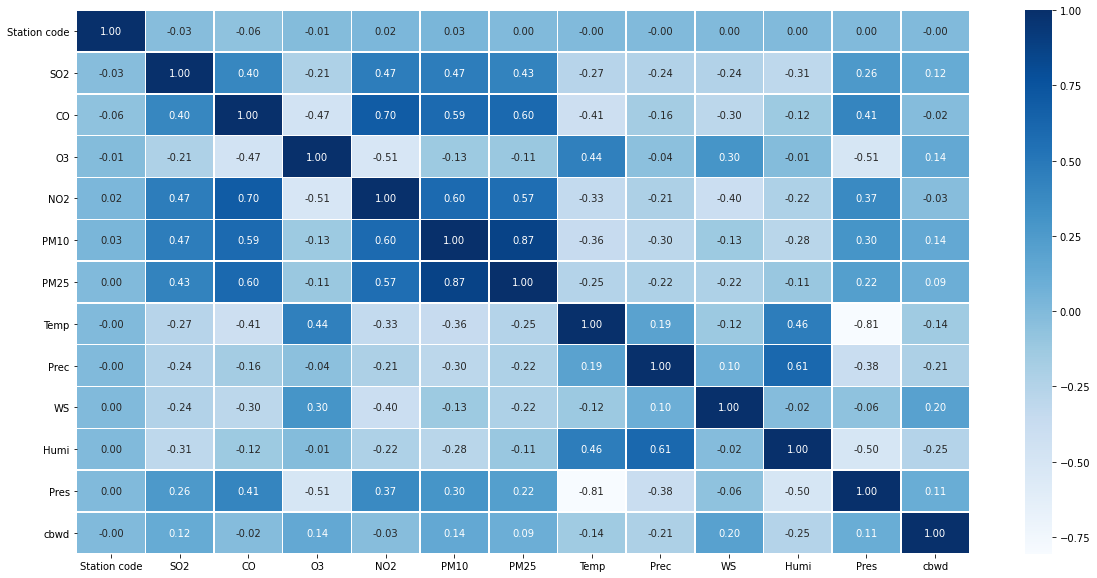

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(method='spearman'), annot=True,fmt='.2f', linewidths=.5, cmap='Blues')

In [ ]:
x = df[['Temp', 'Prec', 'WS', 'Humi', 'Pres', 'cbwd']]

y = df[['PM10']]

In [ ]:
x.shape

(43536, 6)

In [ ]:
# minmaxscaler
# 0,1 사이로
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_col = ['Temp', 'Prec', 'WS', 'Humi', 'Pres', 'cbwd', 'PM10']
df_scaled = scaler.fit_transform(df[scaler_col])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scaler_col

df_scaled.head()

,Temp,Prec,WS,Humi,Pres,cbwd,PM10
0,0.278351,0.0,0.148148,0.268015,0.771167,0.794118,0.131999
1,0.278351,0.0,0.148148,0.268015,0.771167,0.794118,0.207082
2,0.278351,0.0,0.148148,0.268015,0.771167,0.794118,0.139600
3,0.278351,0.0,0.148148,0.268015,0.771167,0.794118,0.151835
4,0.278351,0.0,0.148148,0.268015,0.771167,0.794118,0.147757


In [ ]:
feature_cols = ['Temp', 'Prec', 'WS', 'Humi', 'Pres', 'cbwd']
label_cols = ['CO']
x = df[feature_cols]
y = df[label_cols]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.tail())
print(y_train.tail())

       Temp  Prec   WS  Humi    Pres  cbwd
13505  -1.9   0.0  2.2  39.0  1018.8   290
5770   22.3   0.0  1.6  49.8   999.9   270
23469  25.6   0.0  1.7  66.5   996.9   270
9433   25.3   9.5  1.8  80.9   999.2   290
28213   2.7   0.0  2.3  58.3  1017.3   290
            PM10
13505  39.208333
5770   43.708333
23469  20.541667
9433   31.041667
28213  43.291667


In [ ]:
# x_train = df.iloc[:round(len(df)*0.85),6:-1]
# y_train = df.iloc[:round(len(df)*0.85),0:5]
# x_test = df.iloc[round(len(df)*0.85):,6:-1]
# y_test = df.iloc[round(len(df)*0.85):,0:5]
# x_train

,Temp,Prec,WS,Humi,Pres
0,-1.3,0.0,1.4,39.1,1016.8
1,-1.3,0.0,1.4,39.1,1016.8
2,-1.3,0.0,1.4,39.1,1016.8
3,-1.3,0.0,1.4,39.1,1016.8
4,-1.3,0.0,1.4,39.1,1016.8
...,...,...,...,...,...
37001,25.0,0.0,1.6,77.0,1001.8
37002,25.0,0.0,1.6,77.0,1001.8
37003,25.0,0.0,1.6,77.0,1001.8
37004,25.0,0.0,1.6,77.0,1001.8


# SVR, GBR
 - support vector regression
 - gradient Boosting regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 500)
gbr.fit(x_train, y_train)

print(f"GBR 훈련 세트 점수: {gbr.score(x_train, y_train)} \nGBR 테스트 세트 점수 : {gbr.score(x_test, y_test)}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBR 훈련 세트 점수: 0.9271384027210746 
GBR 테스트 세트 점수 : 0.16487124393241726


In [ ]:
svr = make_pipeline(StandardScaler(), SVR(C=1000.0, epsilon=0.2))
svr.fit(x_train, y_train)
print(svr)
print(f"SVM 훈련 세트 점수: {svr.score(x_train, y_train)} \nSVM 테스트 세트 점수 : {svr.score(x_test, y_test)}")
  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
SVM 훈련 세트 점수: 0.5438398713074385 
SVM 테스트 세트 점수 : 0.09230290671558161


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# svr 표준스케일러 영향! - standardscaler
def svr_gbr(name = '', train_x = '', train_y = '', test_x = '', test_y = '', SVR_C = 1000.0, gbr_n = 500) :

  svr = make_pipeline(StandardScaler(), SVR(C=SVR_C, epsilon=0.2))
  svr.fit(train_x, train_y)
  print(svr)
  print(f"SVM 훈련 세트 점수: {svr.score(train_x, train_y)} \nSVM 테스트 세트 점수 : {svr.score(test_x, test_y)}")
  gbr = GradientBoostingRegressor(n_estimators= gbr_n)
  gbr.fit(train_x, train_y)
  print(gbr)
  print(f"GBR 훈련 세트 점수: {gbr.score(train_x, train_y)} \nGBR 테스트 세트 점수 : {gbr.score(test_x, test_y)}")

  prediction_svm = svr.predict(test_x)
  prediction_gbr = gbr.predict(test_x)

  df = pd.DataFrame({'result' : test_y, name + 'SVM' : prediction_svm, name + 'gbr' : prediction_gbr})
  
  return df

In [ ]:
df = svr_gbr('test', x_train, y_train, x_test, y_test)
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
SVM 훈련 세트 점수: 0.5438398713074385 
SVM 테스트 세트 점수 : 0.09230290671558161


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
GBR 훈련 세트 점수: 0.9271384027210746 
GBR 테스트 세트 점수 : 0.15459935128324898


ValueError: ignored

# Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

xtree = ExtraTreesRegressor(n_estimators=5, random_state=2)
xtree.fit(x_train, y_train)

#xtree = ExtraTreesClassifier(n_estimators=100, random_state=0)
#xtree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(xtree.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xtree.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.059


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# Light Gradient Boosting Machine
 - lightgbm

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=30)
lgbm.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(lgbm.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lgbm.score(x_test, y_test)))

훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.102


# FFNN

In [ ]:
x = df[['Temp', 'Prec', 'WS', 'Humi', 'Pres', 'cbwd']]

y = df[['SO2', 'CO',	'O3',	'NO2', 'PM10', 'PM25']]

print(x)
print(y)

       Temp  Prec   WS  Humi    Pres  cbwd
0      -1.3   0.0  1.4  39.1  1016.8   290
39     -1.8   0.0  1.8  42.0  1018.1   290
78     -4.7   0.0  2.2  42.3  1019.9   290
117    -4.7   0.0  1.4  43.0  1016.5   290
156    -3.0   0.0  1.7  48.4  1010.3   290
...     ...   ...  ...   ...     ...   ...
43336   5.8   0.0  1.8  62.9  1011.0    70
43376   6.7   1.3  1.4  72.1  1012.6    50
43416   0.1   0.2  2.9  70.8  1011.0   270
43456 -10.9   0.0  4.1  55.5  1012.5   270
43496  -8.9   0.0  2.4  53.9  1015.4   270

[1096 rows x 6 columns]
            SO2        CO        O3       NO2       PM10       PM25
0      0.004833  0.554167  0.014583  0.029292  32.666667  17.791667
39     0.004625  0.783333  0.012208  0.036292  32.125000  19.666667
78     0.004583  0.491667  0.017833  0.020625  29.583333  17.583333
117    0.004625  0.662500  0.008792  0.036042  38.708333  23.833333
156    0.005083  0.766667  0.006292  0.044083  47.875000  32.708333
...         ...       ...       ...       ...      

In [ ]:
# print("------numpy change-------")
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 노드의 개수, hidden layer 300,500


model.add(Dense(100, input_shape=(6, ), activation='relu'))
model.add(Dense(100))
model.add(Dense(6))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 606       
Total params: 11,406
Trainable params: 11,406
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 13310.0389 - mse: 13310.0389 - val_loss: 619.9439 - val_mse: 619.9439
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 813.9369 - mse: 813.9369 - val_loss: 284.8289 - val_mse: 284.8289
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 199.3637 - mse: 199.3637 - val_loss: 119.2428 - val_mse: 119.2428
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 121.0924 - mse: 121.0924 - val_loss: 117.4522 - val_mse: 117.4522
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 103.8375 - mse: 103.8375 - val_loss: 116.8511 - val_mse: 116.8511
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 127.5980 - mse: 127.5980 - val_loss: 113.2023 - val_mse: 113.2023
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 105.4680 - mse: 105.4680 - val_loss: 113.6059 - val_mse: 113.6059
Epoch 8/100
21/21 [===

In [ ]:
loss, mse = model.evaluate(x_test, y_test, batch_size=64)
print('acc : ', mse)

4/4 [==============================] - 0s 3ms/step - loss: 65.1762 - mse: 65.1762
acc :  65.17615509033203


In [ ]:
# 4. 평가 예측
loss, mse = model.evaluate(x_test, y_test, batch_size=64)
print('acc : ', mse)
 
y_predict = model.predict(x_test)
print(y_predict)
 
# RMSE 구하기
from sklearn.metrics import mean_squared_error
def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE : ', RMSE(y_test, y_predict)) 
 
# R2 구하기
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print('R2 : ', r2_y_predict)

4/4 [==============================] - 0s 3ms/step - loss: 65.1762 - mse: 65.1762
acc :  65.17615509033203
[[-4.5007815e+00  3.9506736e-01  3.7128779e-01 -5.0255150e-01
   4.1665134e+01  2.2704010e+01]
 [-4.3390813e+00 -1.5557557e-01  6.3054985e-01 -1.3776640e+00
   4.0768185e+01  2.3186390e+01]
 [-2.7631040e+00 -4.0852031e-01 -1.6009192e-01 -4.7297230e-01
   2.7193365e+01  1.5151966e+01]
 ...
 [-4.3043060e+00  1.5477465e-01  6.1863273e-01 -1.0936178e+00
   4.7107052e+01  2.6979038e+01]
 [-4.4381332e+00 -4.8542765e-01  5.0300926e-01 -1.3151830e+00
   4.0508709e+01  2.2412603e+01]
 [-3.8697238e+00  3.5195294e-01  2.8704402e-01 -5.6056217e-03
   2.6137873e+01  1.2012936e+01]]
RMSE :  8.073174835254795
R2 :  -3515021.2699788846
